/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


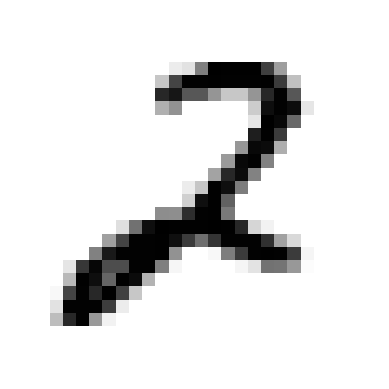

[ True]
0.97765


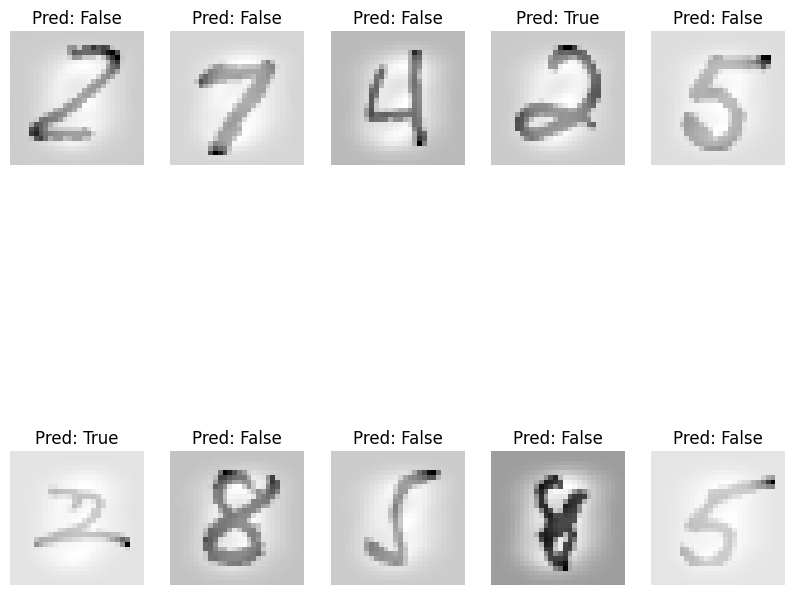

In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']

# Select and plot a digit
some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)  # Reshape to plot it

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

# Split the data into training and testing sets
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# Convert to numpy arrays
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy().astype(np.int8)
y_test = y_test.to_numpy().astype(np.int8)

# Shuffle the training set
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
x_test_scaled = scaler.transform(x_test.astype(np.float64))

# Create labels for detecting the digit '2'
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

# Train a logistic regression classifier with increased max_iter
clf = LogisticRegression(tol=0.1, solver='lbfgs', max_iter=1000)
clf.fit(x_train_scaled, y_train_2)

# Predict example
example = clf.predict([some_digit])
print(example)

# Cross-validation
a = cross_val_score(clf, x_train_scaled, y_train_2, cv=3, scoring="accuracy")
print(a.mean())

# Predict and display 10 random digits from the test set
random_indices = np.random.permutation(len(x_test_scaled))[:10]
x_sample = x_test_scaled[random_indices]
y_sample = y_test[random_indices]
y_pred = clf.predict(x_sample)

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_sample[i].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.title(f"Pred: {y_pred[i]}")

plt.show()
